<a href="https://colab.research.google.com/github/TheWiseGhost/Rice_ML/blob/main/Rice_ML_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Among  the certified rice grown in TURKEY,  the  Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study.  When  looking  at  the  general  characteristics  of  Osmancik species, they have a wide, long, glassy and dull appearance.  When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance.  A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice

By Ilkay Cinar, M. Koklu. 2019

Published in International Journal of Intelligent Systems and Applications in Engineering

https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [18]:
# Rice_ML_Project
# Started on 11/26/23
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import tensorflow as tf

In [3]:
cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class']
df = pd.read_csv('/content/Rice_ML_dataset.data', names=cols)

df['Class'] = (df['Class'] == 'Cammeo').astype(int)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1


Observing the data to see any potential areas where there is a large difference in values for the two species

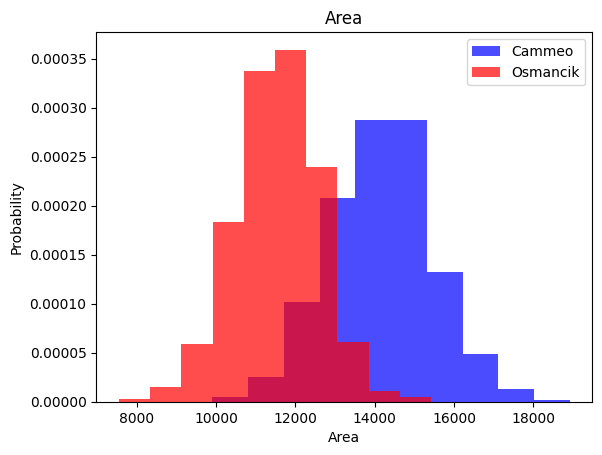

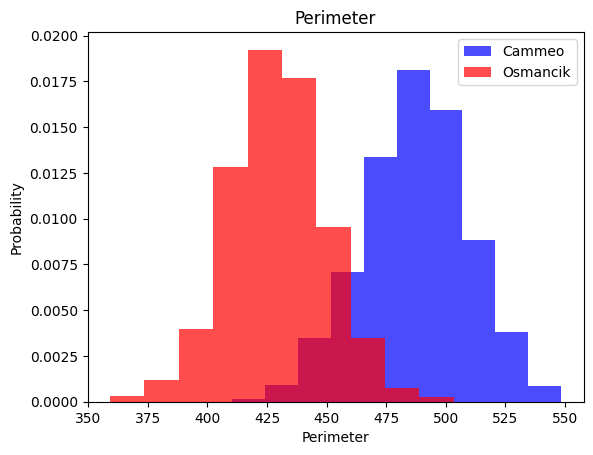

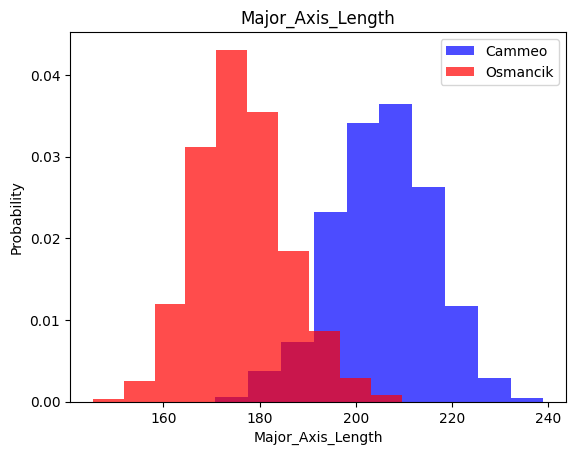

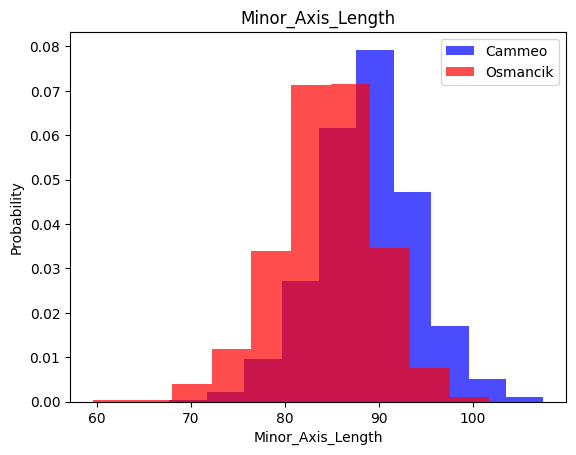

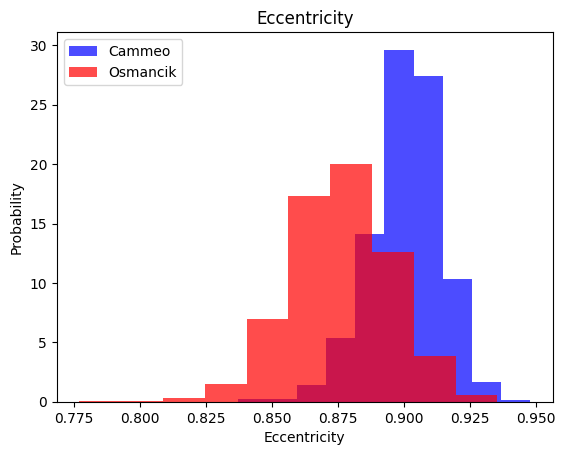

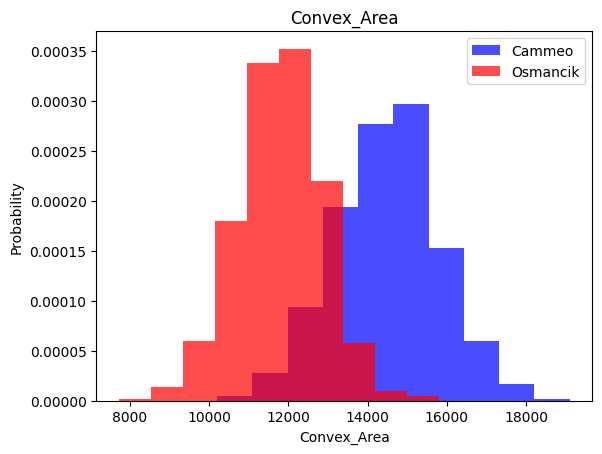

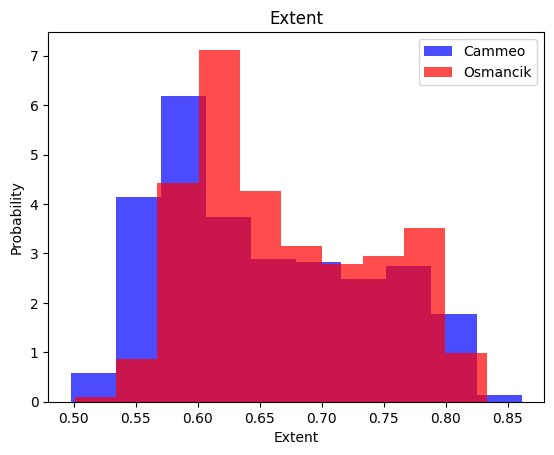

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['Class']==1][label], color='blue', alpha=0.7, label='Cammeo', density='True')
  plt.hist(df[df['Class']==0][label], color='red', alpha=0.7, label='Osmancik', density='True')
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

Splitting and Preparing the data for creating a model

In [5]:
# Using a 60%, 20%, 20% split to train the model
training_data, validation_data, testing_data = np.split(df.sample(frac=1), [int(len(df)*0.6), int(len(df)*0.8)])

In [6]:
def scale_xy(x, y):
  ros = RandomOverSampler()
  scaled_x, scaled_y = ros.fit_resample(x, y)
  return scaled_x, scaled_y

def dataset_scaler(data, scale=False):
  x_values = data[data.columns[:-1]].values
  y_values = data[data.columns[-1]].values

  # Need to make all the features carry an equal weight when creating the model
  scaler = StandardScaler()
  x_values = scaler.fit_transform(x_values)

  if scale:
    x_values, y_values = scale_xy(x_values, y_values)

  # Since x_values is 2D, we need to reshape y_values to 2D
  y_values = np.reshape(y_values, (len(y_values), 1))

  new_data = np.hstack((x_values, y_values))

  return new_data, x_values, y_values

In [7]:
training_data, x_train, y_train = dataset_scaler(training_data, True)

# Do not want to interfere in the data for validation and test
validation_data, x_valid, y_valid = dataset_scaler(validation_data, False)
testing_data, x_test, y_test = dataset_scaler(testing_data, False)

Creating the model

In [8]:
# We want to test many parameters to find the best possible model
def create_nn_model(x_train, y_train, num_nodes, epochs, batch_size, lr, dropout_prob):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(7,)),

    # Dropout layer to help prevent overfitting
    tf.keras.layers.Dropout(dropout_prob),

    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dense(num_nodes, activation='relu'),

    # Use sigmoid because we want output of 0 or 1
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])

  history = nn_model.fit(
    # Leave 0.2 or 20% out to test on
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [9]:
def model_history_plotter(history):
  fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(8, 4))
  fig.tight_layout(pad=4.0)

  # Plot the loss
  axis1.plot(history.history['loss'], label='Loss', color='blue')
  axis1.plot(history.history['val_loss'], label='Val_loss', color='red')
  axis1.set_xlabel('Epochs')
  axis1.set_ylabel('Binary Crossentropy')
  axis1.grid = True
  axis1.legend()

  # Plot the accuracy
  axis2.plot(history.history['accuracy'], label='Accuracy', color='blue')
  axis2.plot(history.history['val_accuracy'], label='Val_accuracy', color='red')
  axis2.set_xlabel('Epochs')
  axis2.set_ylabel('Accuracy')
  axis2.grid = True
  axis2.legend()

  plt.show()

Num Nodes=16, Epochs=100, batch_size=32, lr=0.001, dropout_prob=0


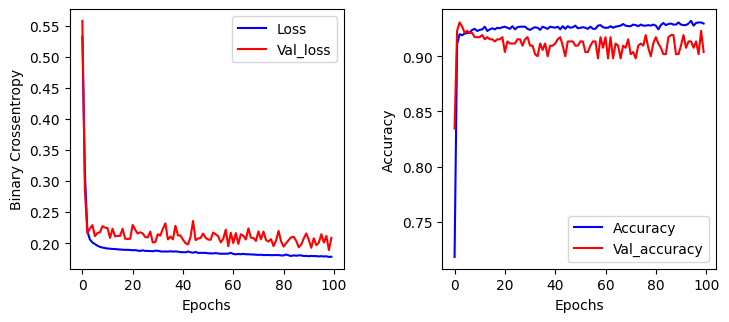

24/24 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9278
Num Nodes=16, Epochs=100, batch_size=32, lr=0.005, dropout_prob=0


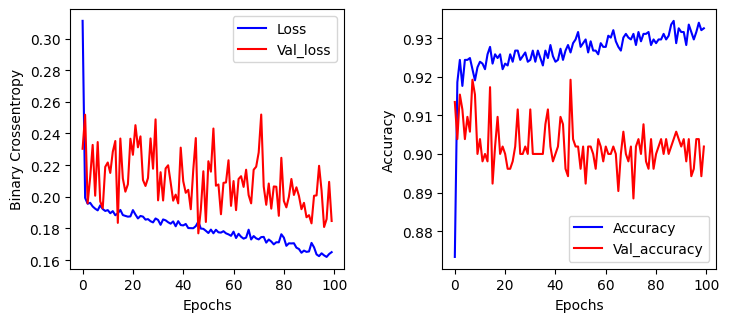

24/24 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9252
Num Nodes=16, Epochs=100, batch_size=32, lr=0.01, dropout_prob=0


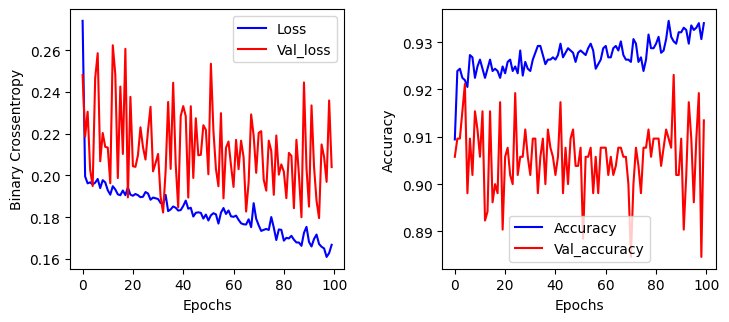

24/24 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9226
Num Nodes=16, Epochs=100, batch_size=32, lr=0.001, dropout_prob=0.2


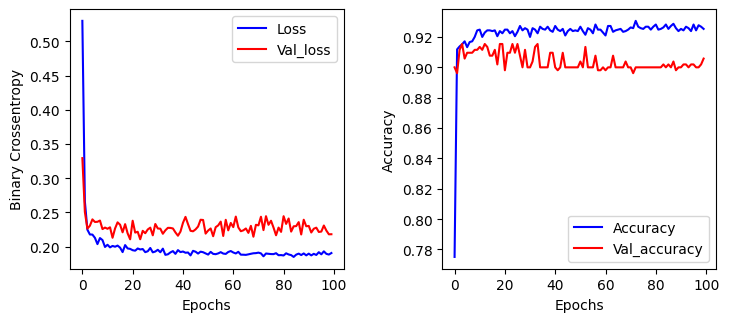

24/24 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9304
Num Nodes=16, Epochs=100, batch_size=32, lr=0.005, dropout_prob=0.2


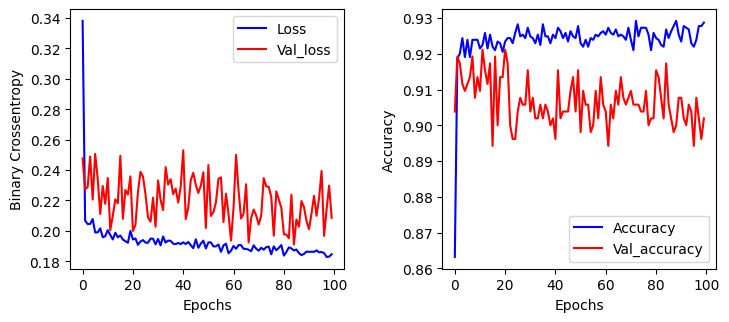

24/24 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9370
Num Nodes=16, Epochs=100, batch_size=32, lr=0.01, dropout_prob=0.2


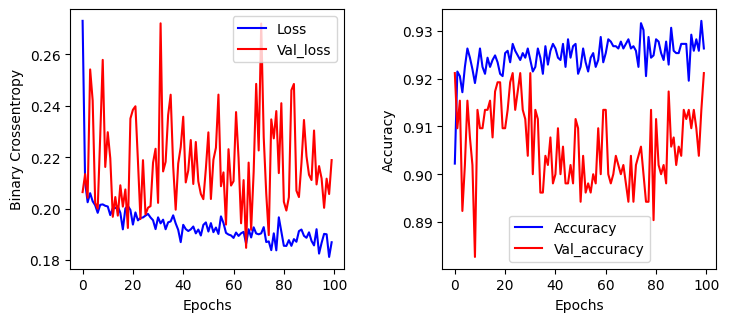

24/24 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9318
Num Nodes=16, Epochs=100, batch_size=64, lr=0.001, dropout_prob=0


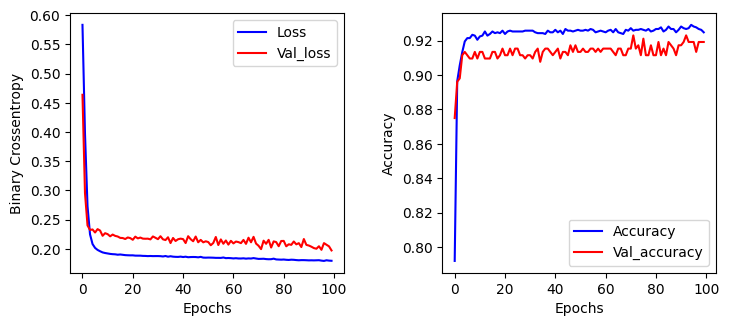

24/24 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9278
Num Nodes=16, Epochs=100, batch_size=64, lr=0.005, dropout_prob=0


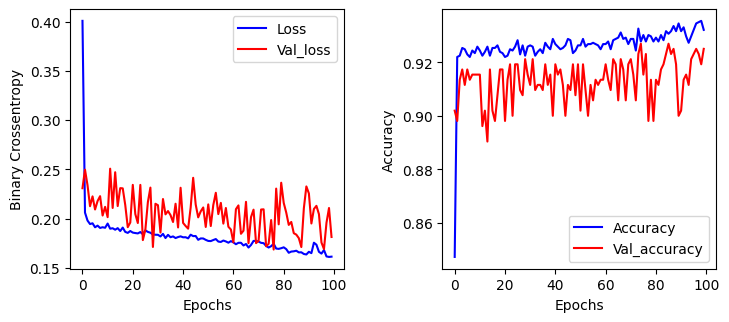

24/24 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.9265
Num Nodes=16, Epochs=100, batch_size=64, lr=0.01, dropout_prob=0


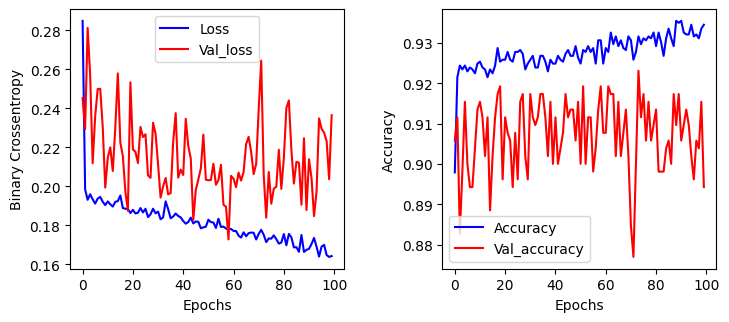

24/24 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9304
Num Nodes=16, Epochs=100, batch_size=64, lr=0.001, dropout_prob=0.2


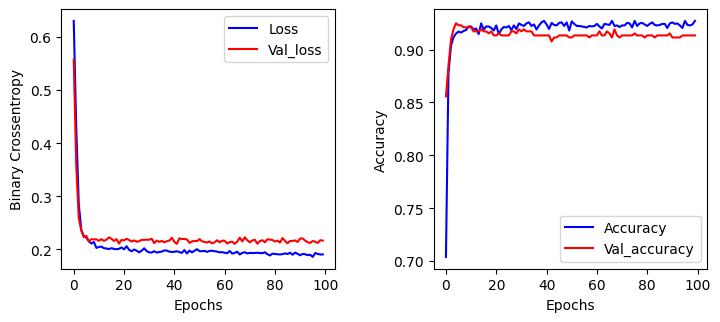

24/24 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9278
Num Nodes=16, Epochs=100, batch_size=64, lr=0.005, dropout_prob=0.2


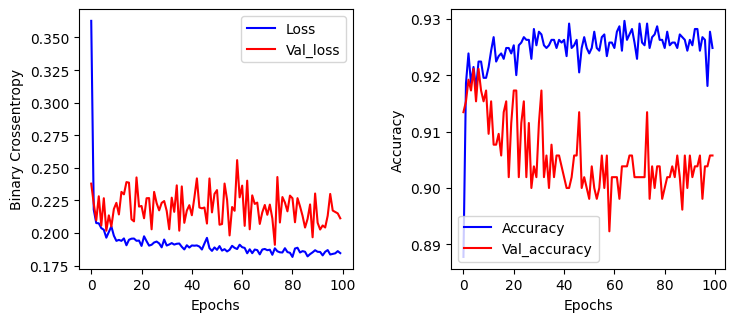

24/24 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.9291
Num Nodes=16, Epochs=100, batch_size=64, lr=0.01, dropout_prob=0.2


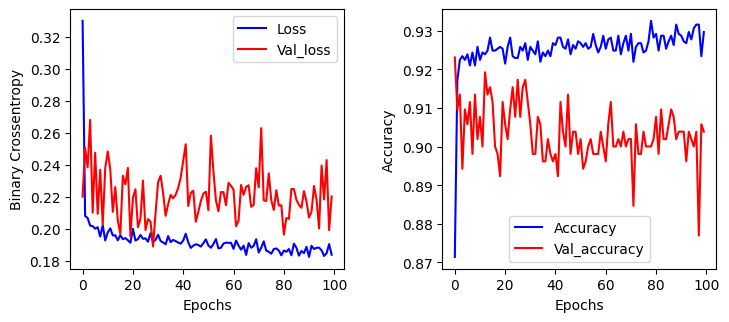

24/24 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9318
Num Nodes=16, Epochs=100, batch_size=128, lr=0.001, dropout_prob=0


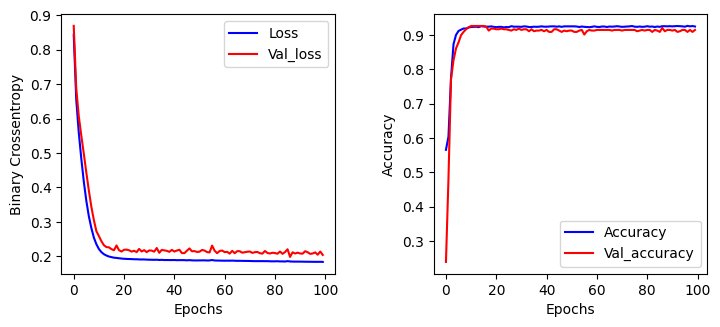

24/24 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9265
Num Nodes=16, Epochs=100, batch_size=128, lr=0.005, dropout_prob=0


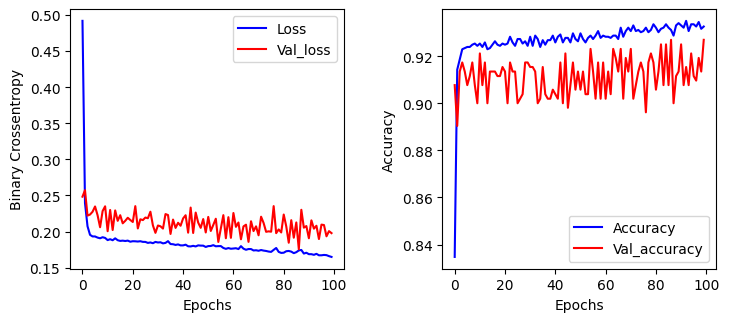

24/24 [==============================] - 0s 4ms/step - loss: 0.2016 - accuracy: 0.9252
Num Nodes=16, Epochs=100, batch_size=128, lr=0.01, dropout_prob=0


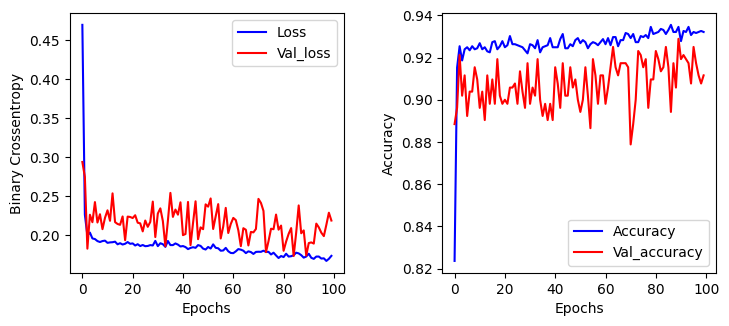

24/24 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9344
Num Nodes=16, Epochs=100, batch_size=128, lr=0.001, dropout_prob=0.2


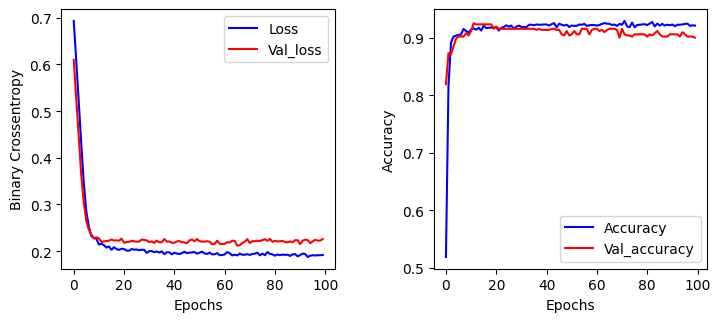

24/24 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9331
Num Nodes=16, Epochs=100, batch_size=128, lr=0.005, dropout_prob=0.2


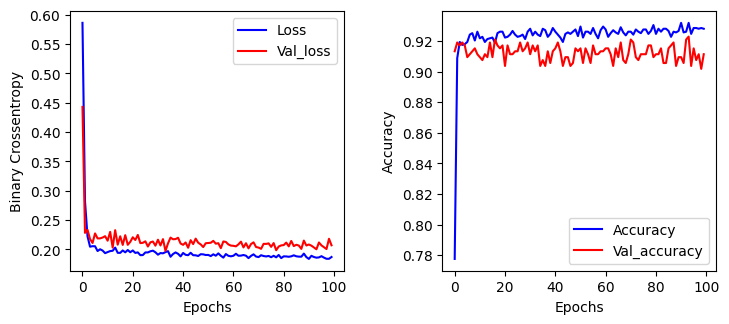

24/24 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9265
Num Nodes=16, Epochs=100, batch_size=128, lr=0.01, dropout_prob=0.2


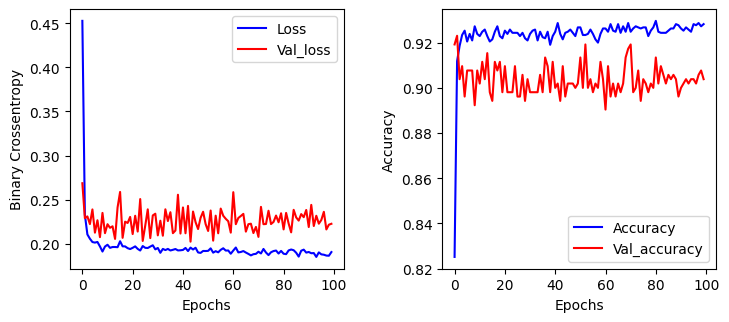

24/24 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9252
Num Nodes=32, Epochs=100, batch_size=32, lr=0.001, dropout_prob=0


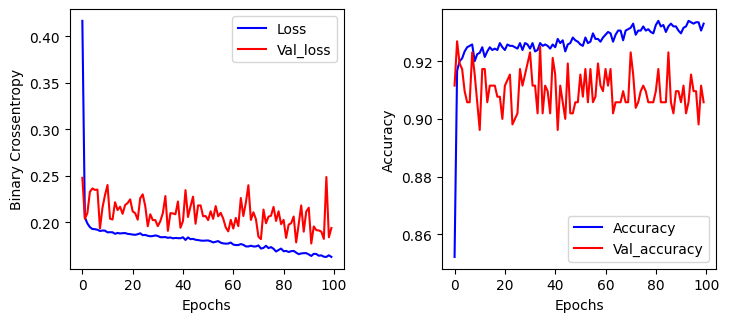

24/24 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9278
Num Nodes=32, Epochs=100, batch_size=32, lr=0.005, dropout_prob=0


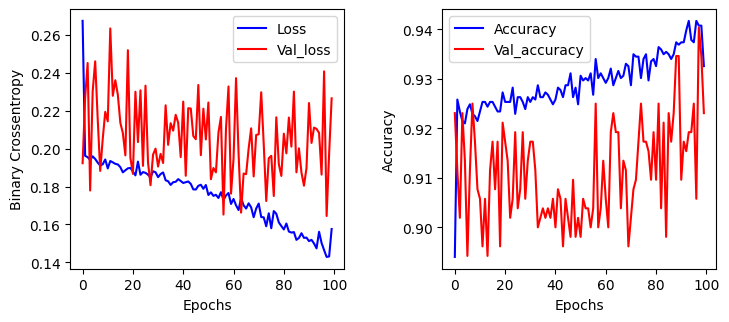

24/24 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.9239
Num Nodes=32, Epochs=100, batch_size=32, lr=0.01, dropout_prob=0


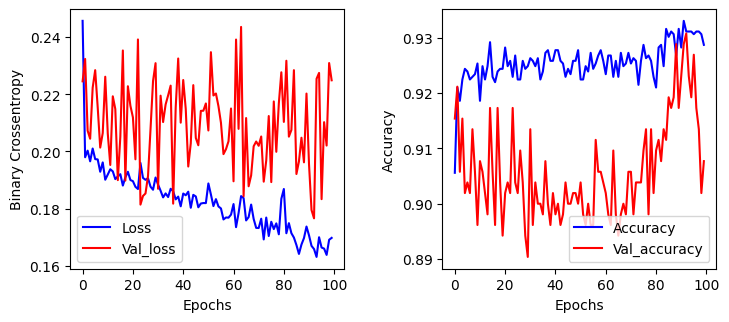

24/24 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9357
Num Nodes=32, Epochs=100, batch_size=32, lr=0.001, dropout_prob=0.2


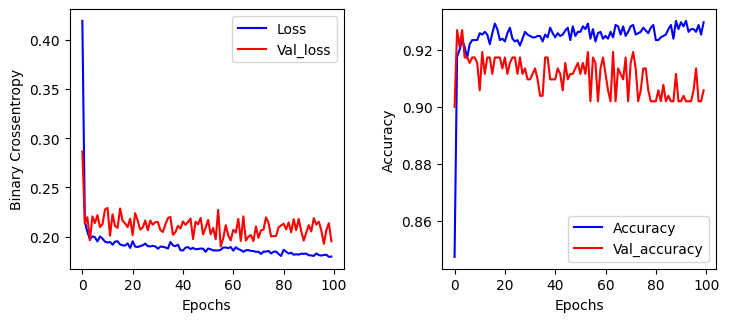

24/24 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9252
Num Nodes=32, Epochs=100, batch_size=32, lr=0.005, dropout_prob=0.2


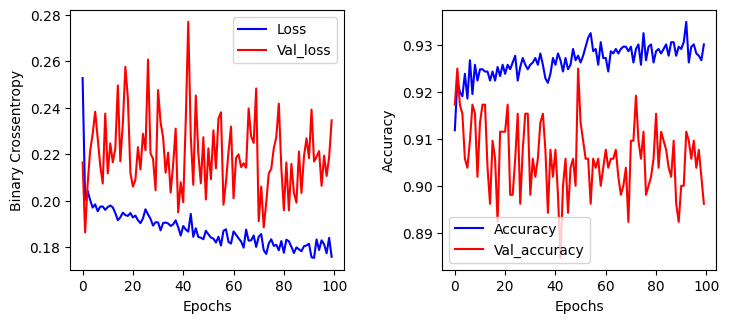

24/24 [==============================] - 0s 3ms/step - loss: 0.2026 - accuracy: 0.9291
Num Nodes=32, Epochs=100, batch_size=32, lr=0.01, dropout_prob=0.2


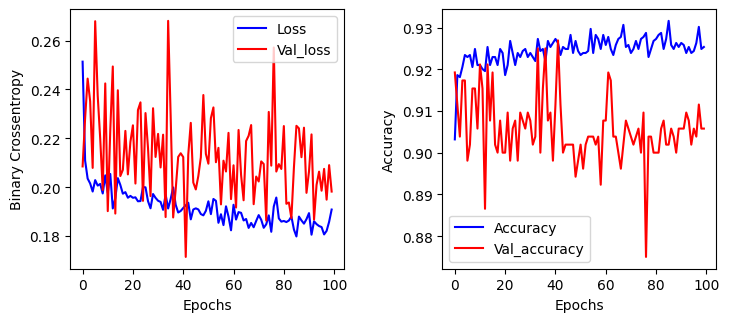

24/24 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9383
Num Nodes=32, Epochs=100, batch_size=64, lr=0.001, dropout_prob=0


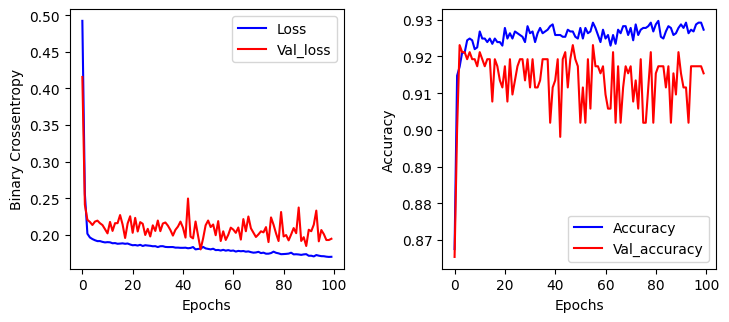

24/24 [==============================] - 0s 3ms/step - loss: 0.1876 - accuracy: 0.9265
Num Nodes=32, Epochs=100, batch_size=64, lr=0.005, dropout_prob=0


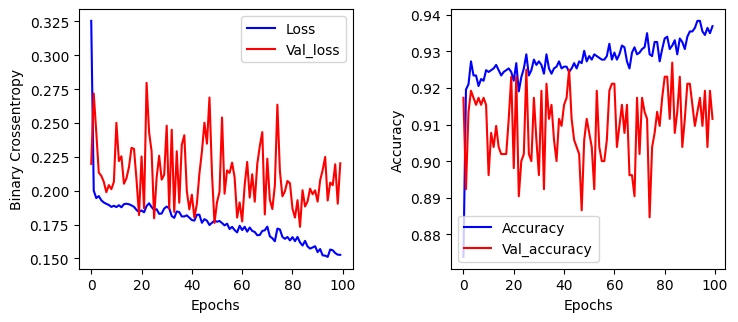

24/24 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9226
Num Nodes=32, Epochs=100, batch_size=64, lr=0.01, dropout_prob=0


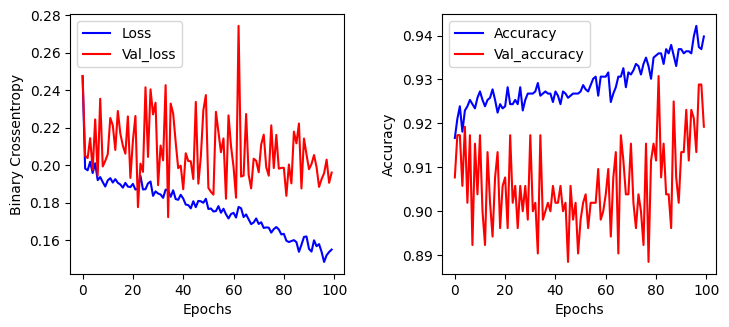

24/24 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.9173
Num Nodes=32, Epochs=100, batch_size=64, lr=0.001, dropout_prob=0.2


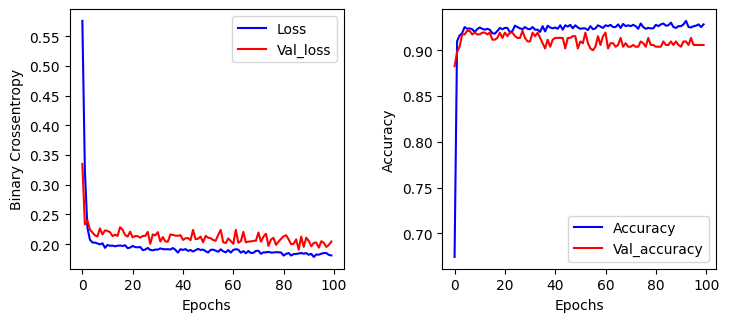

24/24 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9304
Num Nodes=32, Epochs=100, batch_size=64, lr=0.005, dropout_prob=0.2


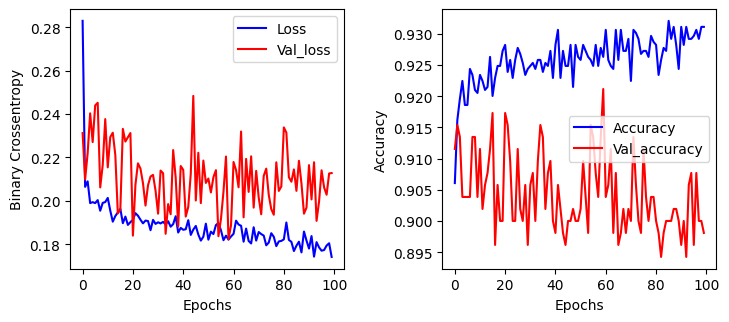

24/24 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.9357
Num Nodes=32, Epochs=100, batch_size=64, lr=0.01, dropout_prob=0.2


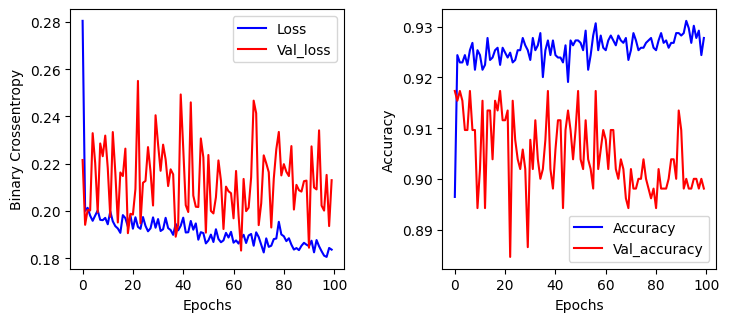

24/24 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9331
Num Nodes=32, Epochs=100, batch_size=128, lr=0.001, dropout_prob=0


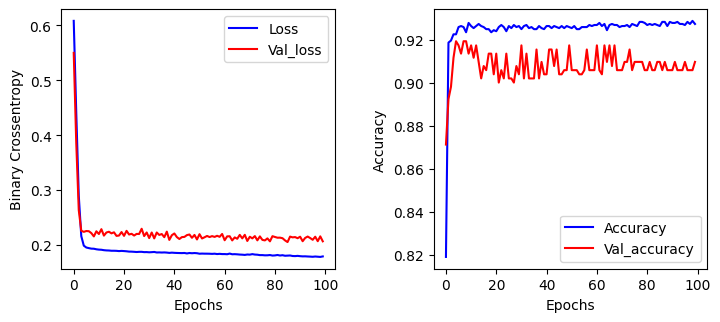

24/24 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.9226
Num Nodes=32, Epochs=100, batch_size=128, lr=0.005, dropout_prob=0


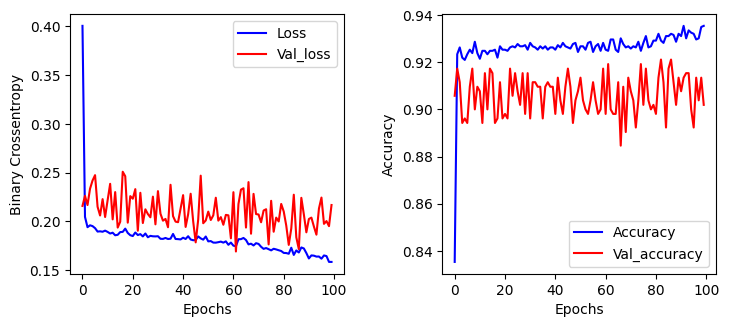

24/24 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9265
Num Nodes=32, Epochs=100, batch_size=128, lr=0.01, dropout_prob=0


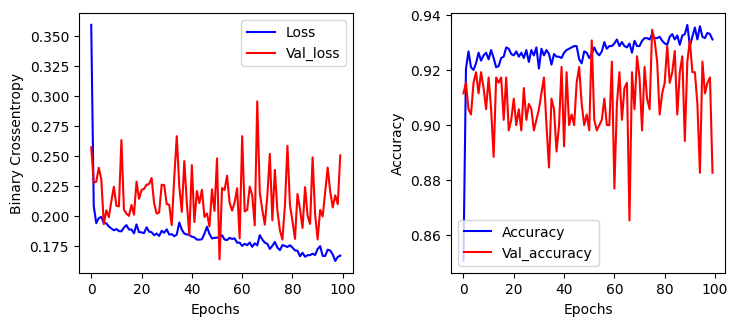

24/24 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9291
Num Nodes=32, Epochs=100, batch_size=128, lr=0.001, dropout_prob=0.2


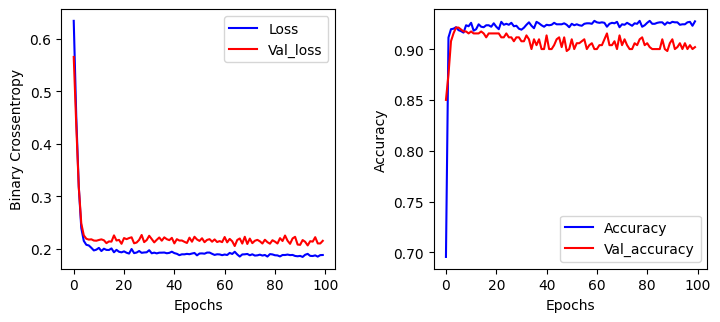

24/24 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9304
Num Nodes=32, Epochs=100, batch_size=128, lr=0.005, dropout_prob=0.2


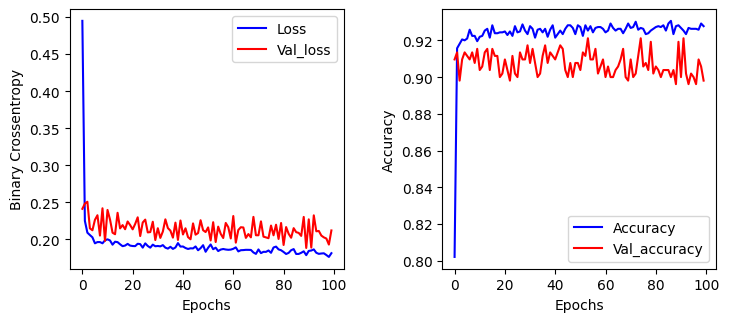

24/24 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9291
Num Nodes=32, Epochs=100, batch_size=128, lr=0.01, dropout_prob=0.2


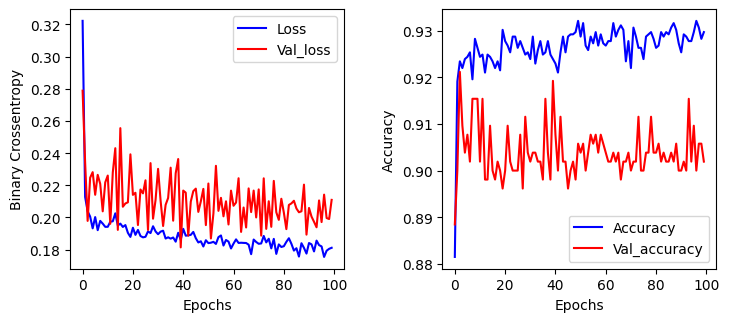

24/24 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 0.9344
Num Nodes=64, Epochs=100, batch_size=32, lr=0.001, dropout_prob=0


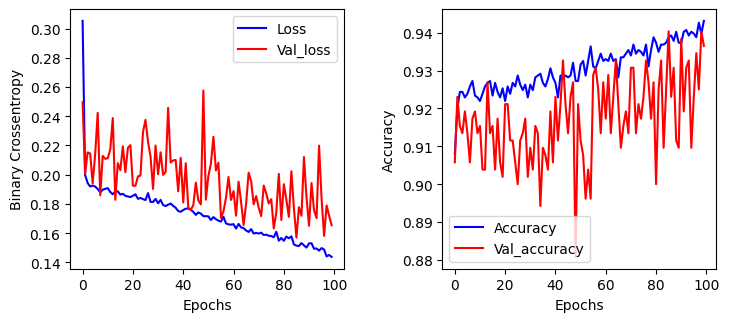

24/24 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.9239
Num Nodes=64, Epochs=100, batch_size=32, lr=0.005, dropout_prob=0


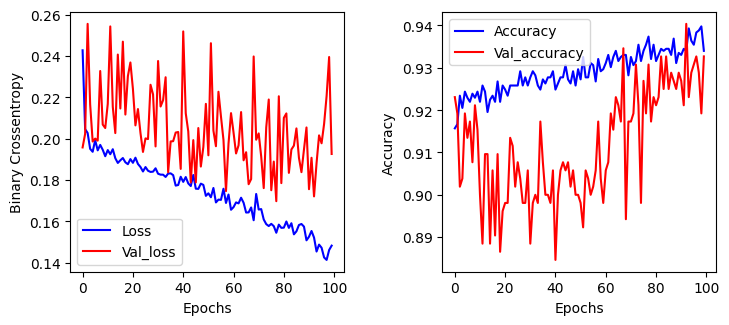

24/24 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.9199
Num Nodes=64, Epochs=100, batch_size=32, lr=0.01, dropout_prob=0


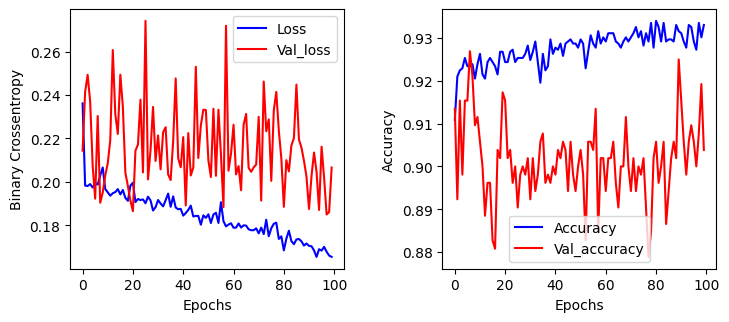

24/24 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9213
Num Nodes=64, Epochs=100, batch_size=32, lr=0.001, dropout_prob=0.2


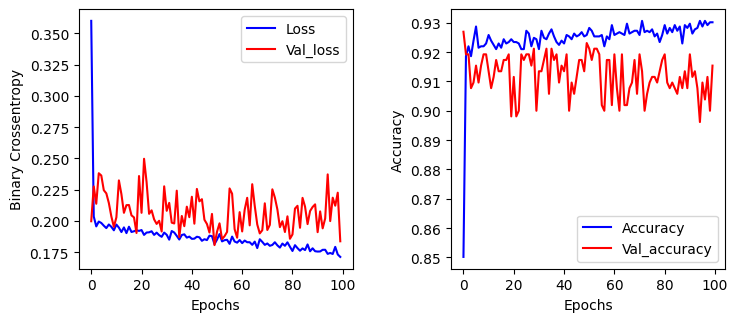

24/24 [==============================] - 0s 3ms/step - loss: 0.1972 - accuracy: 0.9265
Num Nodes=64, Epochs=100, batch_size=32, lr=0.005, dropout_prob=0.2


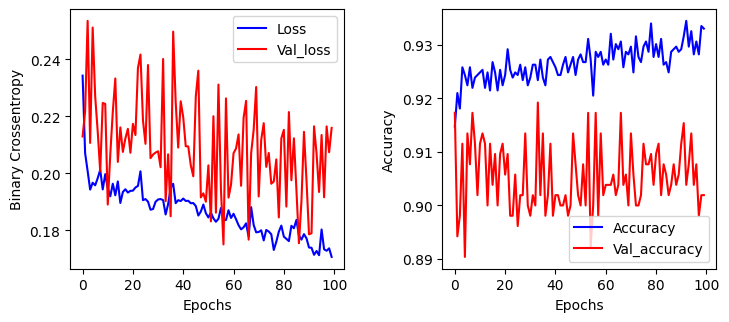

24/24 [==============================] - 0s 3ms/step - loss: 0.2155 - accuracy: 0.9344
Num Nodes=64, Epochs=100, batch_size=32, lr=0.01, dropout_prob=0.2


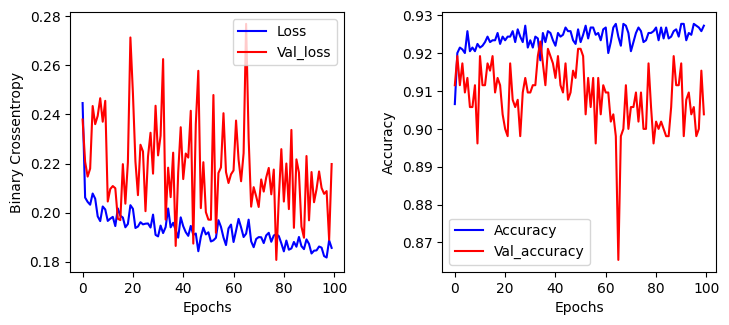

24/24 [==============================] - 0s 2ms/step - loss: 0.1968 - accuracy: 0.9304
Num Nodes=64, Epochs=100, batch_size=64, lr=0.001, dropout_prob=0


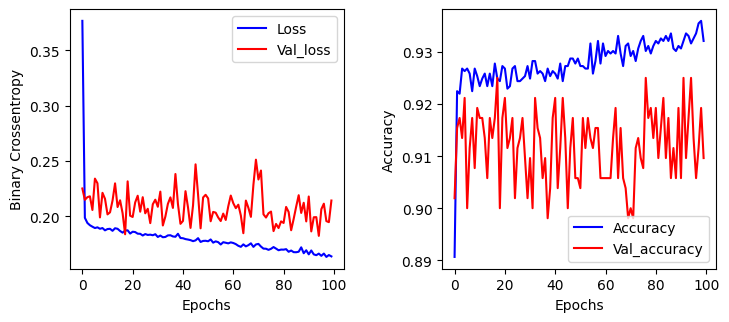

24/24 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9278
Num Nodes=64, Epochs=100, batch_size=64, lr=0.005, dropout_prob=0


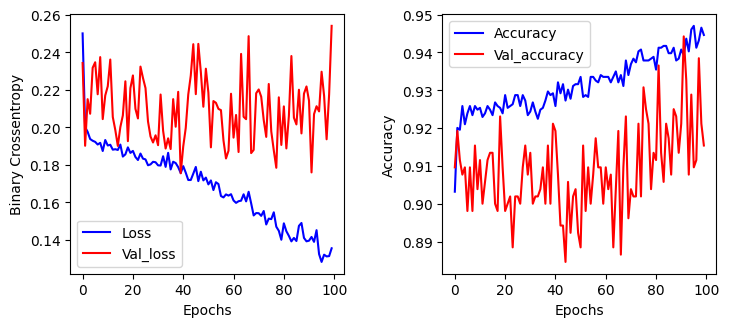

24/24 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.9265
Num Nodes=64, Epochs=100, batch_size=64, lr=0.01, dropout_prob=0


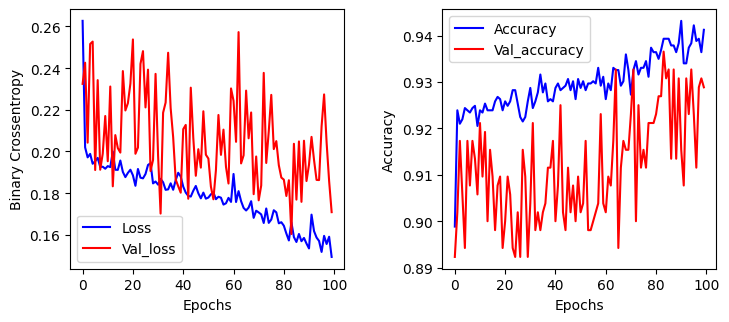

24/24 [==============================] - 0s 3ms/step - loss: 0.2272 - accuracy: 0.9318
Num Nodes=64, Epochs=100, batch_size=64, lr=0.001, dropout_prob=0.2


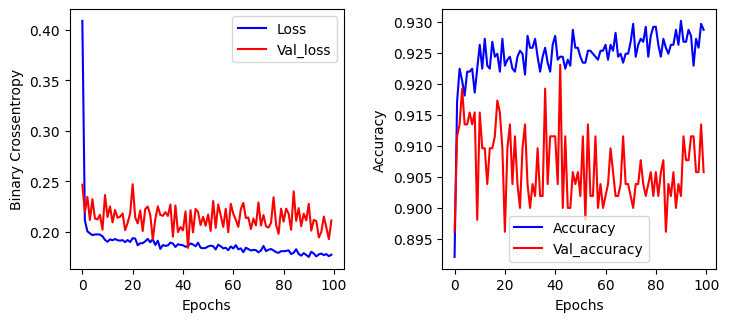

24/24 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9291
Num Nodes=64, Epochs=100, batch_size=64, lr=0.005, dropout_prob=0.2


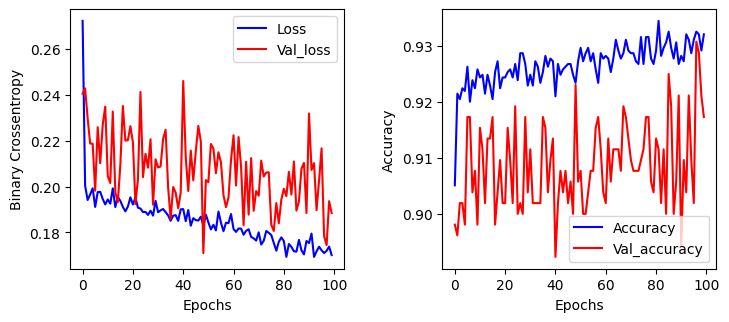

24/24 [==============================] - 0s 4ms/step - loss: 0.2046 - accuracy: 0.9278
Num Nodes=64, Epochs=100, batch_size=64, lr=0.01, dropout_prob=0.2


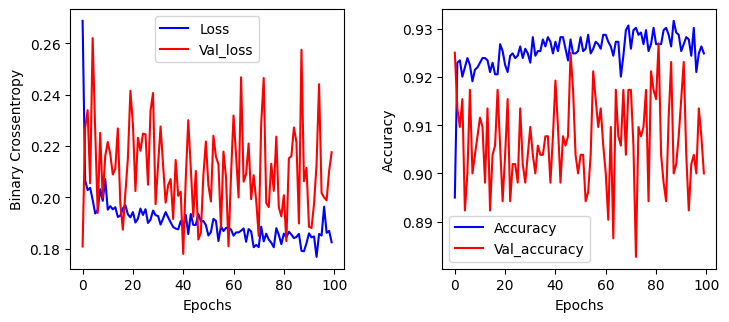

24/24 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9278
Num Nodes=64, Epochs=100, batch_size=128, lr=0.001, dropout_prob=0


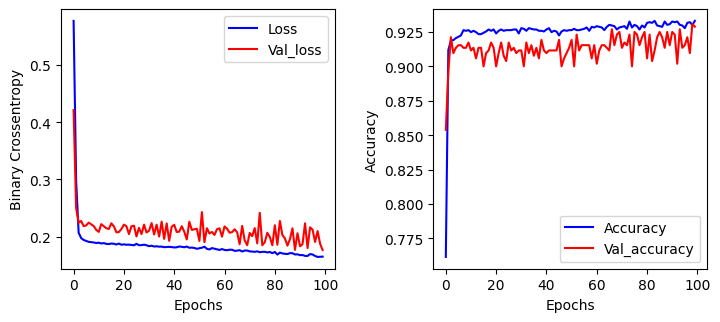

24/24 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9226
Num Nodes=64, Epochs=100, batch_size=128, lr=0.005, dropout_prob=0


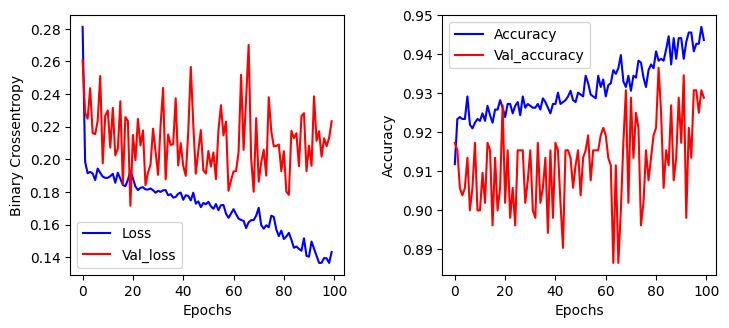

24/24 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.9199
Num Nodes=64, Epochs=100, batch_size=128, lr=0.01, dropout_prob=0


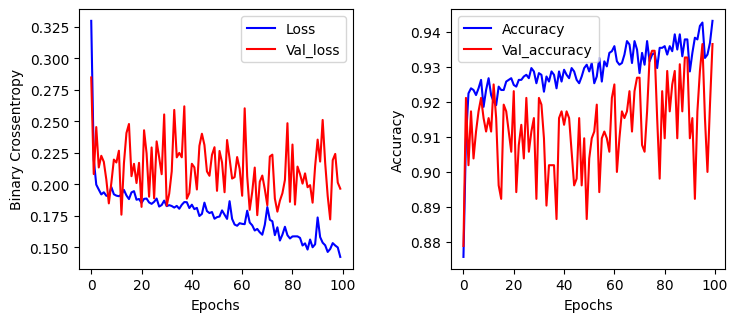

24/24 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.9213
Num Nodes=64, Epochs=100, batch_size=128, lr=0.001, dropout_prob=0.2


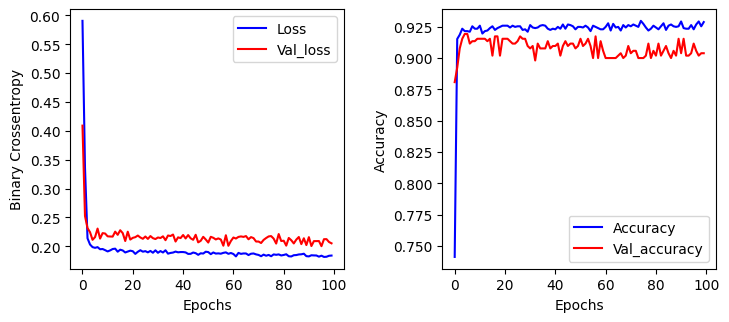

24/24 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9278
Num Nodes=64, Epochs=100, batch_size=128, lr=0.005, dropout_prob=0.2


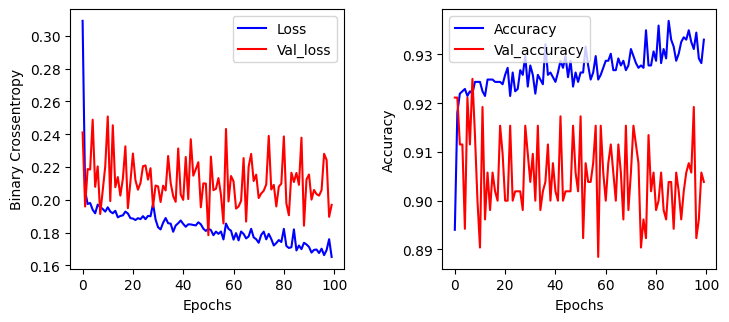

24/24 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9318
Num Nodes=64, Epochs=100, batch_size=128, lr=0.01, dropout_prob=0.2


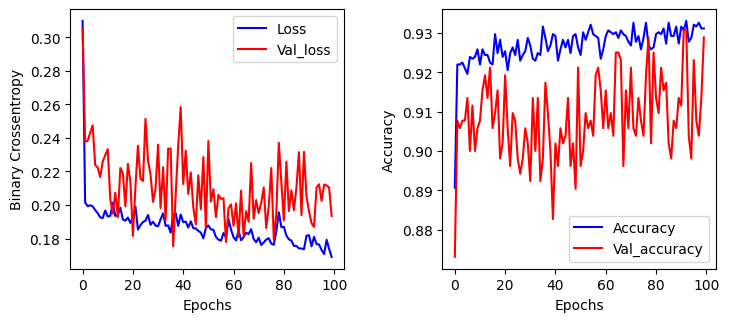

24/24 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9265


In [10]:
# Finding the best possible model
epochs = 100
lowest_validation_loss = float('inf')
lowest_validation_loss_model = None
lowest_validation_loss_model_params = None

# Test bunch of models with varying parameters
for num_nodes in [16, 32, 64]:
  for batch_size in [32, 64, 128]:
    for dropout_prob in [0, 0.2]:
      for lr in [0.001, 0.005, 0.01]:
        print(f'Num Nodes={num_nodes}, Epochs={epochs}, batch_size={batch_size}, lr={lr}, dropout_prob={dropout_prob}')
        new_nn_model, history = create_nn_model(x_train, y_train, num_nodes, epochs, batch_size, lr, dropout_prob)
        model_history_plotter(history)


        validation_loss = new_nn_model.evaluate(x_valid, y_valid)[0]
        if validation_loss < lowest_validation_loss:
          lowest_validation_loss = validation_loss
          lowest_validation_loss_model_params = f'Num Nodes={num_nodes}, Epochs={epochs}, batch_size={batch_size}, lr={lr}. dropout_prob={dropout_prob}'
          lowest_validation_loss_model = new_nn_model

In [11]:
print(lowest_validation_loss_model_params)

Num Nodes=16, Epochs=100, batch_size=64, lr=0.001. dropout_prob=0.2


So from all our models this one is the best -

Num Nodes=16, Epochs=100, batch_size=64, lr=0.001,
 dropout_prob=0.2




In [17]:
y_pred = lowest_validation_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Precision = Out of how many the model labeled as 0, how many are actually 0
# Recall = Out of all the actuall 0s, how many of those did the model say were 0.
# f1-score = Combination of Precision and Recall score
print(classification_report(y_test, y_pred))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       447
           1       0.90      0.94      0.92       315

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



So in conclusion, the best model resulted in an accuracy of 0.93.
It appears the model did tend to overlabel 1 (Cammeo) rather than 0 (Osminak) after looking at the precision scores.
However, the similar recall scores indicate the model is not strongly baised. Overall, I am relatively pleased with the accuracy result of 0.93 and believe a 0.95 accuracy is achievable with further testing.